In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import curves.bezier as bezier
import curves.fitCurves as fit
import StressTools as tools
import utils
import fitting
import cycloidData
from scipy import stats, interpolate

In [2]:
cycloids = cycloidData.loadAllCycloids()

In [3]:
def convertLonRaw(lon):
    if lon < 180:
        return lon + 360
    
    return lon

convertLon = np.vectorize(convertLonRaw)

500

5

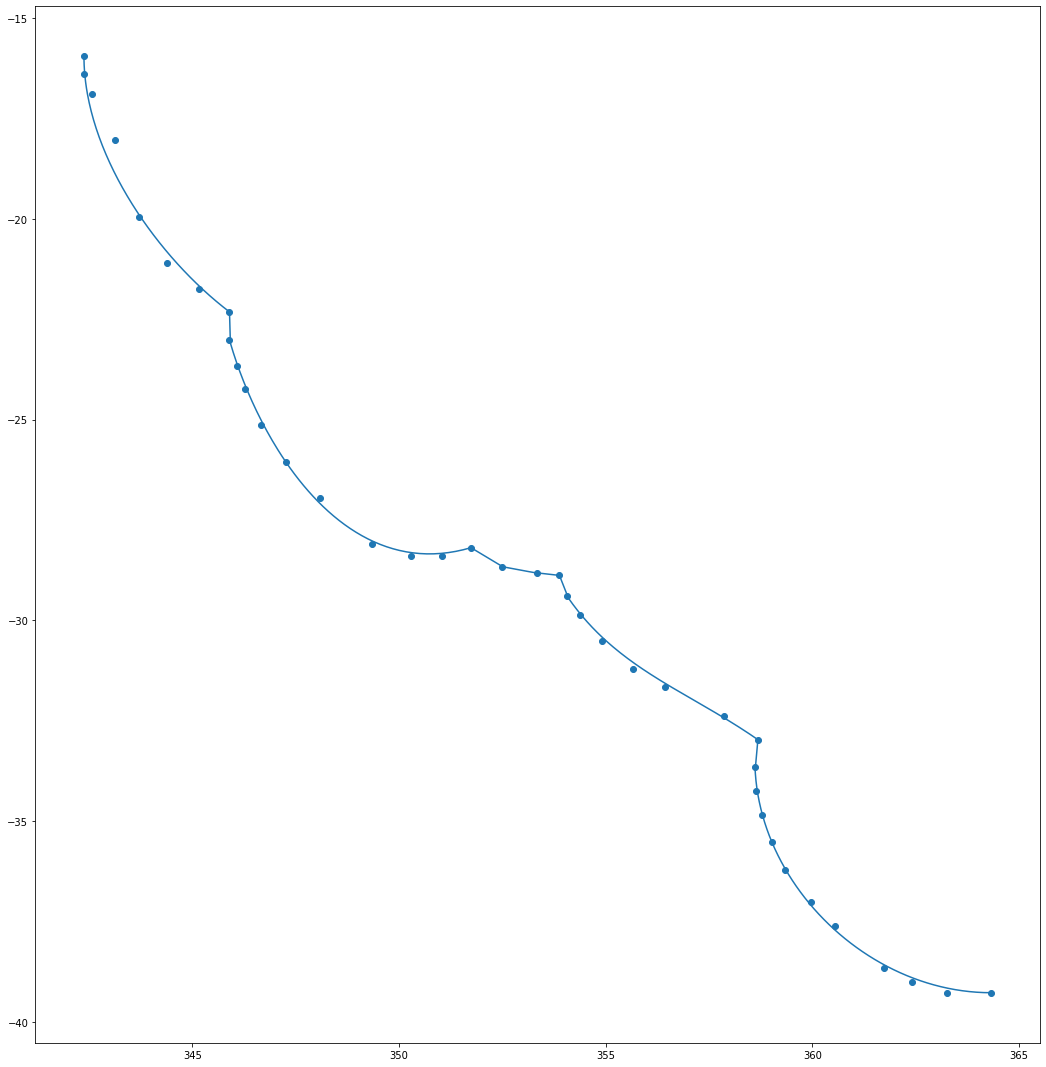

In [14]:
current = 'mira'

arcPoints = cycloids[current].arcs[0]
arc = cycloids[current].curve

# arc = fitting.createCycloidBezier(cycloids[current].arcs, maxError=0.107)

allPoints = pd.DataFrame(np.vstack(cycloids[current].arcs), columns=['lon', 'lat'])


arc['lon'] = convertLon(arc['lon'])
allPoints['lon'] = convertLon(allPoints['lon'])

# arc = fitting.createCycloidBezier(cycloids[current].arcs, maxError=0.0575)

lonRange = arc['lon'].max() - arc['lon'].min()
latRange = arc['lat'].max() - arc['lat'].min()

ratio = latRange / lonRange


plt.figure(figsize=(18,18*ratio))
# plt.figure(figsize=(18,4))
plt.plot(arc['lon'], arc['lat'])
plt.scatter(allPoints['lon'], allPoints['lat'])


display(len(arc))
display(len(cycloids[current].arcs))

/Users/stan/Applications/Anaconda/anaconda3/envs/europa_cycloids/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


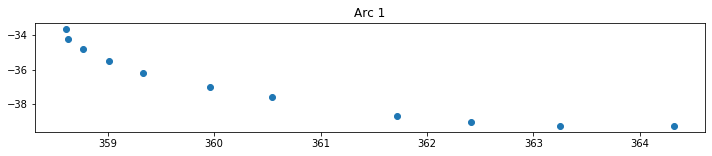

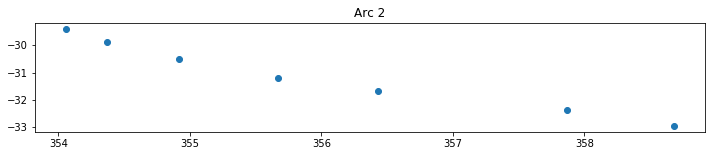

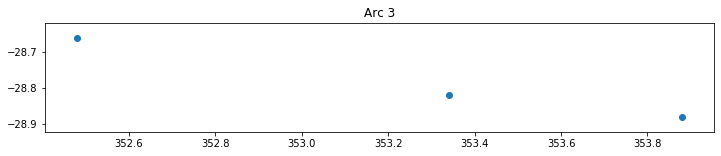

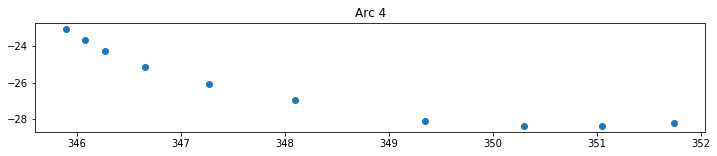

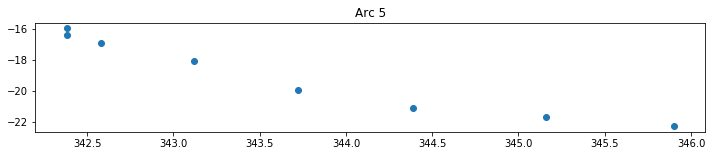

In [7]:

for i in range(len(cycloids[current].arcs)):
    allPoints = cycloids[current].arcs[i]
    allPoints['lon'] = convertLon(allPoints['lon'])

    plt.figure(figsize=(12,2))
    plt.scatter(allPoints['lon'], allPoints['lat'])
    plt.title(f'Arc {i+1}')